# Task 2

### Predictive modeling of customer bookings
This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

### Attribute Information:


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

#### Train a machine learning model

When our data is ready for modelling, we should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, we should use an algorithm that easily allows us to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

#### Evaluate model and present findings

After training our model, we should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, we should create a visualisation to interpret how each variable contributed to the model.

#### Importe Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel


import warnings
warnings.filterwarnings('ignore')

### Import Data Set

In [2]:
df = pd.read_csv("C:\\Users\\Galaxy Computers\\Desktop\\customer_booking.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


#### Statstical Analyzed 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Analayzing Catagorical Variables 

In [6]:
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [7]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [8]:
df.flight_day.value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [9]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [10]:
df.booking_origin.value_counts()


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

#### Encoding Catagirical varables( )

In [11]:
# One-hot encoding gerçekleştirme
encoded_df = pd.get_dummies(df, columns=['sales_channel','trip_type'])

# One-hot encoded sütunları orijinal DataFrame'e birleştirme
df = pd.concat([df, encoded_df], axis=1)


In [12]:
df.drop(columns=['sales_channel','trip_type','route'], axis=1, inplace=True)

In [13]:
df.flight_day

,flight_day,flight_day
0,Sat,Sat
1,Sat,Sat
2,Wed,Wed
3,Sat,Sat
4,Wed,Wed
...,...,...
49995,Sat,Sat
49996,Sun,Sun
49997,Sat,Sat
49998,Mon,Mon


In [14]:
print('Rows',len(df),'Columns',
len(df.columns))

Rows 50000 Columns 27


In [15]:
#Droping duplicate varables
df = df.iloc[:, ~df.columns.duplicated()]

In [16]:
print('Rows',len(df),'Columns',
len(df.columns))

Rows 50000 Columns 16


In [17]:
column_to_encode = ['flight_day','booking_origin']

# Create an instance of the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the encoder on the specified columns
df[column_to_encode] = ordinal_encoder.fit_transform(df[column_to_encode])

In [26]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,acora
0,2,262,19,7,2.0,61.0,1,0,0,5.52,0,1,0,0,0,1,0.552
1,1,112,20,3,2.0,61.0,0,0,0,5.52,0,1,0,0,0,1,0.552
2,2,243,22,17,6.0,36.0,1,1,0,5.52,0,1,0,0,0,1,0.552
3,1,96,31,4,2.0,61.0,0,0,1,5.52,0,1,0,0,0,1,1.552
4,2,68,22,15,6.0,36.0,1,0,1,5.52,0,1,0,0,0,1,1.552


### Let's create a new column

In [20]:
df[['wants_in_flight_meals','flight_duration']]

,wants_in_flight_meals,flight_duration
0,0,5.52
1,0,5.52
2,0,5.52
3,1,5.52
4,1,5.52
...,...,...
49995,1,5.62
49996,0,5.62
49997,1,5.62
49998,1,5.62


In [22]:
df['acora'] = df['flight_duration']/10 + df['wants_in_flight_meals']

### Let's split the data into Features Variables(X) and Target Variable(y)

In [30]:
X = df.drop(['booking_complete'], axis=1)

y = df['booking_complete']

In [31]:
print('X',X.shape,'y',y.shape)

X (50000, 16) y (50000,)


### Train-Test Split

###### Train size = %80

Test size = %20

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
print('X_train',X_train.shape,
'| X_test',X_test.shape)

X_train (40000, 16) | X_test (10000, 16)


### Feature Scaling

In [42]:
#Let's create Standart Scaler
scale = StandardScaler()

#It is required to scale columns because there are differences the value of columns
X_train.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,acora
20330,1,18,21,14,5.0,4.0,1,0,0,8.83,0,1,0,0,1,0.883
17532,1,23,41,5,1.0,50.0,1,0,1,4.75,1,0,0,0,1,1.475
45819,2,46,6,17,2.0,17.0,1,1,1,5.33,0,1,0,0,1,1.533
34807,1,40,4,12,0.0,91.0,0,1,0,4.67,1,0,0,0,1,0.467
31888,1,56,4,3,0.0,43.0,1,1,1,7.00,1,0,0,0,1,1.700


In [43]:
#It is required to scale columns because there are differences the value of columns
X_test.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,acora
11841,2,33,20,9,5.0,4.0,1,1,1,8.83,1,0,0,0,1,1.883
19602,1,115,137,12,0.0,37.0,1,0,0,8.83,1,0,0,0,1,0.883
45519,1,14,6,4,4.0,17.0,0,0,0,6.42,1,0,0,0,1,0.642
25747,1,1,2,15,1.0,37.0,1,1,0,4.75,1,0,0,0,1,0.475
42642,1,47,6,1,2.0,51.0,0,0,1,7.57,1,0,0,0,1,1.757


In [44]:
#Let's create an object to know x train columns
columns=X_train.columns

#Scale X train and X test
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

#the type of data changes after scaling
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
#Let's convert numpy array to pandas dataframe
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

#First 5 rows of X train after scaling
X_train.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,acora
0,-0.579221,-0.739942,-0.061043,0.907074,0.952083,-1.046750,0.707810,-0.646986,-0.86506,1.035417,-2.807662,2.807662,-0.049049,-0.088807,0.10164,-0.506743
1,-0.579221,-0.684686,0.528727,-0.755604,-1.021350,0.355767,0.707810,-0.646986,1.15599,-1.686049,0.356168,-0.356168,-0.049049,-0.088807,0.10164,0.592949
2,0.403509,-0.430508,-0.503370,1.461300,-0.527992,-0.650387,0.707810,1.545629,1.15599,-1.299174,-2.807662,2.807662,-0.049049,-0.088807,0.10164,0.700690
3,-0.579221,-0.496815,-0.562347,0.537590,-1.514709,1.605837,-1.412809,1.545629,-0.86506,-1.739411,0.356168,-0.356168,-0.049049,-0.088807,0.10164,-1.279500
4,-0.579221,-0.319996,-0.562347,-1.125088,-1.514709,0.142340,0.707810,1.545629,1.15599,-0.185241,0.356168,-0.356168,-0.049049,-0.088807,0.10164,1.010907


In [46]:
#First 5 rows of X test after scaling
X_test.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,acora
0,0.403509,-0.574174,-0.090531,-0.016636,0.952083,-1.046750,0.707810,1.545629,1.15599,1.035417,0.356168,-0.356168,-0.049049,-0.088807,0.10164,1.350846
1,-0.579221,0.332025,3.359619,0.537590,-1.514709,-0.040597,0.707810,-0.646986,-0.86506,1.035417,0.356168,-0.356168,-0.049049,-0.088807,0.10164,-0.506743
2,-0.579221,-0.784146,-0.503370,-0.940346,0.458725,-0.650387,-1.412809,-0.646986,-0.86506,-0.572116,0.356168,-0.356168,-0.049049,-0.088807,0.10164,-0.954422
3,-0.579221,-0.927812,-0.621323,1.091816,-1.021350,-0.040597,0.707810,1.545629,-0.86506,-1.686049,0.356168,-0.356168,-0.049049,-0.088807,0.10164,-1.264639
4,-0.579221,-0.419457,-0.503370,-1.494572,-0.527992,0.386256,-1.412809,-0.646986,1.15599,0.194964,0.356168,-0.356168,-0.049049,-0.088807,0.10164,1.116789


### Mutual Information

In [52]:
selector = SelectKBest(lambda X,y : mutual_info_classif(X,y, discrete_features=True), k=8)

In [53]:
selector.fit_transform(X,y)

array([[262.   ,  19.   ,   7.   , ...,   0.   ,   5.52 ,   0.552],
       [112.   ,  20.   ,   3.   , ...,   0.   ,   5.52 ,   0.552],
       [243.   ,  22.   ,  17.   , ...,   1.   ,   5.52 ,   0.552],
       ...,
       [ 24.   ,   6.   ,  22.   , ...,   0.   ,   5.62 ,   1.562],
       [ 15.   ,   6.   ,  11.   , ...,   0.   ,   5.62 ,   1.562],
       [ 19.   ,   6.   ,  10.   , ...,   1.   ,   5.62 ,   0.562]])

### Choosing Importante Features

In [59]:
model = RandomForestClassifier(random_state=0)

selectr = SelectFromModel(model, max_features=7)
selectr.fit_transform(X,y)

array([[262.,  19.,   7.,   2.,  61.],
       [112.,  20.,   3.,   2.,  61.],
       [243.,  22.,  17.,   6.,  36.],
       ...,
       [ 24.,   6.,  22.,   2.,   4.],
       [ 15.,   6.,  11.,   1.,   4.],
       [ 19.,   6.,  10.,   4.,   4.]])

In [65]:
selectr.estimator_.feature_importances_

array([0.05500864, 0.23730209, 0.14704085, 0.16720526, 0.10433755,
       0.1203105 , 0.01421157, 0.01709373, 0.00816085, 0.05804347,
       0.0050165 , 0.00532735, 0.00034019, 0.0008638 , 0.00112358,
       0.05861408])

In [63]:
X.columns[selectr.get_support()]

Index(['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
       'booking_origin'],
      dtype='object')

In [72]:
X_train = X_train[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
       'booking_origin']]
X_test = X_test[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
       'booking_origin']]

In [75]:
print(X_train.shape,X_test.shape)

(40000, 5) (10000, 5)


In [73]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [76]:
X_train.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin
0,-0.739942,-0.061043,0.907074,0.952083,-1.046750
1,-0.684686,0.528727,-0.755604,-1.021350,0.355767
2,-0.430508,-0.503370,1.461300,-0.527992,-0.650387
3,-0.496815,-0.562347,0.537590,-1.514709,1.605837
4,-0.319996,-0.562347,-1.125088,-1.514709,0.142340


## Machine Learning Model

#### Random Forest Classifier

In [77]:
# Create Random Forest Classification Object
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [78]:
# Predicting the Test set results
y_pred=rf.predict(X_test)

##### Performance Reporting

In [79]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8462
Precision: 0.4413145539906103
Recall: 0.06212822207534699
F1-score: 0.10892236384704518


##### Confusion Matrix

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8368  119]
 [1419   94]]


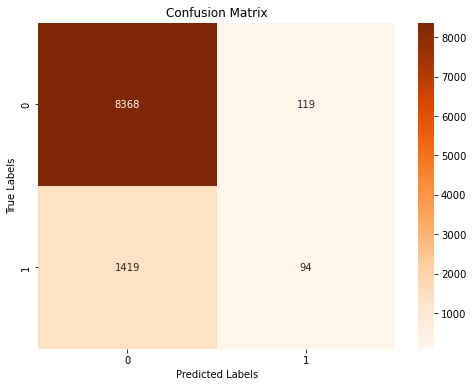

In [81]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

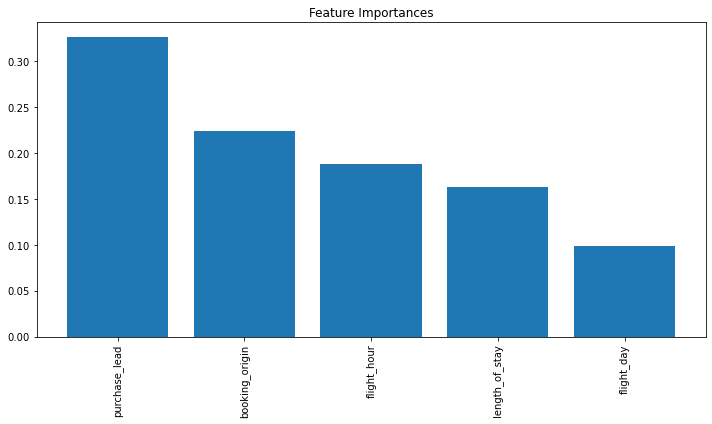

In [82]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()

Upon analyzing the performance metrics presented above, it becomes evident that the main cause of the low F1 score is an imbalanced dataset. The disparity between the number of entries classified as 0 and 1 is responsible for this issue. To rectify the situation, we can equalize the number of entries for both classes by balancing the dataset, effectively addressing the problem at hand.

#### Balance The Dataset

In [83]:
#Let's check y label 
print(df.booking_complete.value_counts())

#We clearly see that the data is inbalanced in below after calculating the relative frequency (or proportion) of each unique value
print(df.booking_complete.value_counts()/np.float(len(df)))

0    42522
1     7478
Name: booking_complete, dtype: int64
0    0.85044
1    0.14956
Name: booking_complete, dtype: float64


In [84]:
# Let's create a dataframe with all labels 0 and sample 7500 rows from it
df_0 = df[df['booking_complete'] == 0].sample(n=8000, random_state=42)

# Let's create a dataframe with all 1
df_1 = df[df['booking_complete'] == 1]

# Combine df_0 and df_1
df_balanced = pd.concat([df_1, df_0], ignore_index=True)

# Split the DataFrame into features (X) and labels (y)
X = df_balanced.drop('booking_complete', axis=1)  
y = df_balanced['booking_complete']

# Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

### Random Forest Classifier for balanced dataset

In [85]:
# Create Random Forest Classification Object
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

# Predicting the Test set results
balanced_y_pred=rf.predict(X_test)

##### Performance Reporting for balanced dataset

In [86]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, balanced_y_pred)
precision = precision_score(y_test, balanced_y_pred)
recall = recall_score(y_test, balanced_y_pred)
f1 = f1_score(y_test, balanced_y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6944444444444444
Precision: 0.675300063171194
Recall: 0.7121918720852765
F1-score: 0.6932555123216602


#### Confusion Matrix for balanced dataset

In [87]:
conf_matrix = confusion_matrix(y_test, balanced_y_pred)
print(conf_matrix)

[[1081  514]
 [ 432 1069]]


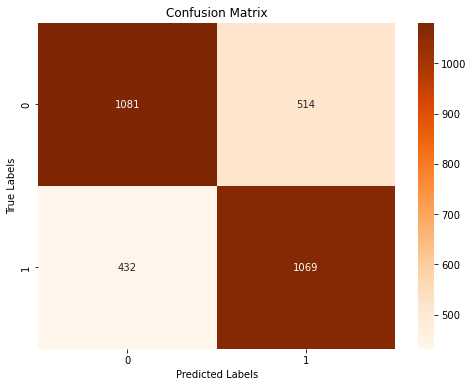

In [88]:
# Create a heatmap of the confusion matrix for balanced dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest Classifier with Hyperparameter Tuning

In [90]:
# Let's create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [91]:
# Let's define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [92]:

# Let's create GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [93]:
# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [94]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

#### Model Building

In [95]:
# Train the model on the balanced training data
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [96]:
# Make predictions on the test dataset
best_y_pred = best_rf.predict(X_test)

#### Performance Reporting for the best model

In [97]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, best_y_pred)
precision = precision_score(y_test, best_y_pred)
recall = recall_score(y_test, best_y_pred)
f1 = f1_score(y_test, best_y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6902454780361758
Precision: 0.6695869837296621
Recall: 0.7128580946035976
F1-score: 0.6905453372055502
